In [324]:
!pip install graphviz

In [325]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from keras.layers import Dropout

from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [326]:
data = pd.read_csv('cover_data.csv')
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [328]:
data["class"].nunique

<bound method IndexOpsMixin.nunique of 0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: class, Length: 581012, dtype: int64>

In [329]:
scaler = StandardScaler()
one_hot = OneHotEncoder(handle_unknown='ignore')
transformer = ColumnTransformer([
    ('scale', scaler, ["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points"])
    #('encode', one_hot, ["class"])
], remainder = 'passthrough')
 

In [330]:
transformed_data = transformer.fit_transform(data)

In [331]:
column_names = transformer.get_feature_names_out()

In [332]:
transformed_data

array([[-1.29780509, -0.93515698, -1.48281978, ...,  0.        ,
         0.        ,  5.        ],
       [-1.31923485, -0.89047967, -1.61636259, ...,  0.        ,
         0.        ,  5.        ],
       [-0.5549068 , -0.14883628, -0.68156292, ...,  0.        ,
         0.        ,  2.        ],
       ...,
       [-2.04784663,  0.02987297,  0.38677957, ...,  0.        ,
         0.        ,  3.        ],
       [-2.05498988,  0.12816306,  0.11969395, ...,  0.        ,
         0.        ,  3.        ],
       [-2.05856151,  0.08348575, -0.14739167, ...,  0.        ,
         0.        ,  3.        ]])

In [333]:
transformed_df = pd.DataFrame(transformed_data, columns=column_names, index=data.index)

In [334]:
transformed_df

,scale__Elevation,scale__Aspect,scale__Slope,scale__Horizontal_Distance_To_Hydrology,scale__Vertical_Distance_To_Hydrology,scale__Horizontal_Distance_To_Roadways,scale__Hillshade_9am,scale__Hillshade_Noon,scale__Hillshade_3pm,scale__Horizontal_Distance_To_Fire_Points,...,remainder__Soil_Type32,remainder__Soil_Type33,remainder__Soil_Type34,remainder__Soil_Type35,remainder__Soil_Type36,remainder__Soil_Type37,remainder__Soil_Type38,remainder__Soil_Type39,remainder__Soil_Type40,remainder__class
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,-2.012130,-0.023740,0.787408,-0.867697,-0.504653,-1.437962,1.040496,0.692069,-0.640851,-0.863386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
581008,-2.029988,-0.032675,0.653865,-0.952383,-0.590424,-1.446299,1.040496,0.692069,-0.614724,-0.857345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
581009,-2.047847,0.029873,0.386780,-0.985317,-0.676194,-1.449506,0.891075,0.894409,-0.327327,-0.850548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
581010,-2.054990,0.128163,0.119694,-0.985317,-0.710502,-1.449506,0.666942,1.096749,0.012325,-0.842997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [335]:
substrings = ["remainder__", 'scale__']
for substring in substrings:
    transformed_df.columns = [col.replace(substring, "") for col in transformed_df.columns]

In [336]:
X = transformed_df.drop('class', axis=1)

In [337]:
Y = transformed_df['class']

In [338]:
Y

0         5.0
1         5.0
2         2.0
3         2.0
4         5.0
         ... 
581007    3.0
581008    3.0
581009    3.0
581010    3.0
581011    3.0
Name: class, Length: 581012, dtype: float64

In [339]:
X

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,-2.012130,-0.023740,0.787408,-0.867697,-0.504653,-1.437962,1.040496,0.692069,-0.640851,-0.863386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581008,-2.029988,-0.032675,0.653865,-0.952383,-0.590424,-1.446299,1.040496,0.692069,-0.614724,-0.857345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,-2.047847,0.029873,0.386780,-0.985317,-0.676194,-1.449506,0.891075,0.894409,-0.327327,-0.850548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,-2.054990,0.128163,0.119694,-0.985317,-0.710502,-1.449506,0.666942,1.096749,0.012325,-0.842997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [340]:
Y.nunique()

7

In [341]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state= 45)

In [342]:
Y_train = keras.utils.to_categorical(Y_train, 8)

In [343]:
Y_test = keras.utils.to_categorical(Y_test, 8)

In [344]:
Y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [345]:
# model time 
model = Sequential()
model.add(tf.keras.layers.InputLayer(shape=(len(X_train.columns), )))
model.add(tf.keras.layers.Dense(16, activation= 'relu'))
model.add(tf.keras.layers.Dense(32, activation= 'relu'))
model.add(Dropout(0.1))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(Dropout(0.05))
model.add(tf.keras.layers.Dense(8 ,activation= 'softmax'))
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=.001), loss = 'categorical_crossentropy', metrics = ['accuracy' , 'mse'])

In [346]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 16)             │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,744 (10.72 KB)

 Trainable params: 2,744 (10.72 KB)

 Non-trainable params: 0 (0.00 B)

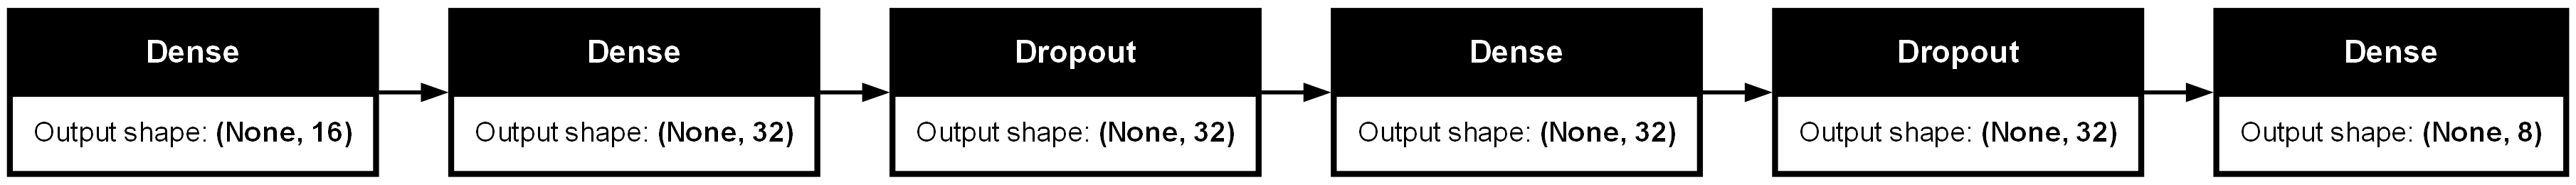

In [347]:
keras.utils.plot_model(model, show_shapes=True, rankdir='LR')

In [348]:
ES = EarlyStopping(monitor = 'val_accuracy', patience = 5, restore_best_weights = True)
history = model.fit(X_train, Y_train, epochs= 60, batch_size= 64, validation_split=0.1, callbacks = [ES])

Epoch 1/60
6128/6128 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.6772 - loss: 0.7747 - mse: 0.0545 - val_accuracy: 0.7542 - val_loss: 0.5653 - val_mse: 0.0427
Epoch 2/60
6128/6128 ━━━━━━━━━━━━━━━━━━━━ 5s 811us/step - accuracy: 0.7518 - loss: 0.5719 - mse: 0.0430 - val_accuracy: 0.7733 - val_loss: 0.5225 - val_mse: 0.0395
Epoch 3/60
6128/6128 ━━━━━━━━━━━━━━━━━━━━ 5s 809us/step - accuracy: 0.7647 - loss: 0.5409 - mse: 0.0407 - val_accuracy: 0.7779 - val_loss: 0.5071 - val_mse: 0.0383
Epoch 4/60
6128/6128 ━━━━━━━━━━━━━━━━━━━━ 5s 826us/step - accuracy: 0.7747 - loss: 0.5227 - mse: 0.0392 - val_accuracy: 0.7912 - val_loss: 0.4895 - val_mse: 0.0368
Epoch 5/60
6128/6128 ━━━━━━━━━━━━━━━━━━━━ 5s 808us/step - accuracy: 0.7822 - loss: 0.5092 - mse: 0.0382 - val_accuracy: 0.7967 - val_loss: 0.4725 - val_mse: 0.0355
Epoch 6/60
6128/6128 ━━━━━━━━━━━━━━━━━━━━ 5s 809us/step - accuracy: 0.7851 - loss: 0.5016 - mse: 0.0376 - val_accuracy: 0.7980 - val_loss: 0.4702 - val_mse: 0.0353
Epoch 7/60
6128/61

In [349]:
loss, acc, mse = model.evaluate(X_test, Y_test)
print(f"Loss : {loss}")
print(f"Accuracy: {acc}")
print(f"Mean Squared Error {mse}")

4540/4540 ━━━━━━━━━━━━━━━━━━━━ 3s 624us/step - accuracy: 0.8316 - loss: 0.4056 - mse: 0.0303
Loss : 0.40740805864334106
Accuracy: 0.8306678533554077
Mean Squared Error 0.030466880649328232


In [350]:
#convert labels back
predictions = model.predict(X_test)
true_classes  = np.argmax(Y_test, axis=1)
Predicted_classes = np.argmax(predictions, axis=1)
class_names = ['Spruce/Fir', 'Lodgepole Pine',
                   'Ponderosa Pine', 'Cottonwood/Willow',
                   'Aspen', 'Douglas-fir', 'Krummholz']

4540/4540 ━━━━━━━━━━━━━━━━━━━━ 3s 648us/step


In [351]:
classification = classification_report(true_classes, Predicted_classes, target_names= class_names)
cm = confusion_matrix(true_classes, Predicted_classes)

In [352]:
def heatmap():
    fig, ax = plt.subplots(figsize = (14, 14))
    heatmap = sns.heatmap(cm, fmt= 'g', cmap='Blues', annot= True, ax=ax)
    ax.set_xlabel("Predicted Classes")
    ax.set_ylabel("True Classes")
    ax.set_title("Confusion matrix")
    ax.xaxis.set_ticklabels(class_names)
    ax.yaxis.set_ticklabels(class_names)



In [353]:
def accuracy_curve():
    fig, ax = plt.subplots(figsize = (5, 5))
    ax.plot(history.history["accuracy"])
    ax.plot(history.history["val_accuracy"])
    ax.set_xlabel('epoch')
    ax.set_ylabel('accuracy')
    ax.set_title("Accuracy score")
    ax.legend(['train', 'val'], loc = 'upper left')

In [354]:
def loss_curve():
    fig,ax = plt.subplots(figsize = (5, 5))
    ax.plot(history.history['loss'])
    ax.plot(history.history['val_loss'])
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.set_title('loss')
    ax.legend(['loss', 'val loss'], loc = 'upper left')

In [359]:
print(classification_report(Predicted_classes, true_classes, target_names=class_names))

                   precision    recall  f1-score   support

       Spruce/Fir       0.79      0.86      0.82     48770
   Lodgepole Pine       0.90      0.82      0.86     77455
   Ponderosa Pine       0.84      0.80      0.82      9513
Cottonwood/Willow       0.61      0.82      0.70       511
            Aspen       0.34      0.74      0.47      1095
      Douglas-fir       0.52      0.69      0.59      3328
        Krummholz       0.79      0.89      0.84      4581

         accuracy                           0.83    145253
        macro avg       0.69      0.80      0.73    145253
     weighted avg       0.84      0.83      0.83    145253



'              precision    recall  f1-score   support\n\n           1       0.79      0.86      0.82     48770\n           2       0.90      0.82      0.86     77455\n           3       0.84      0.80      0.82      9513\n           4       0.61      0.82      0.70       511\n           5       0.34      0.74      0.47      1095\n           6       0.52      0.69      0.59      3328\n           7       0.79      0.89      0.84      4581\n\n    accuracy                           0.83    145253\n   macro avg       0.69      0.80      0.73    145253\nweighted avg       0.84      0.83      0.83    145253\n'

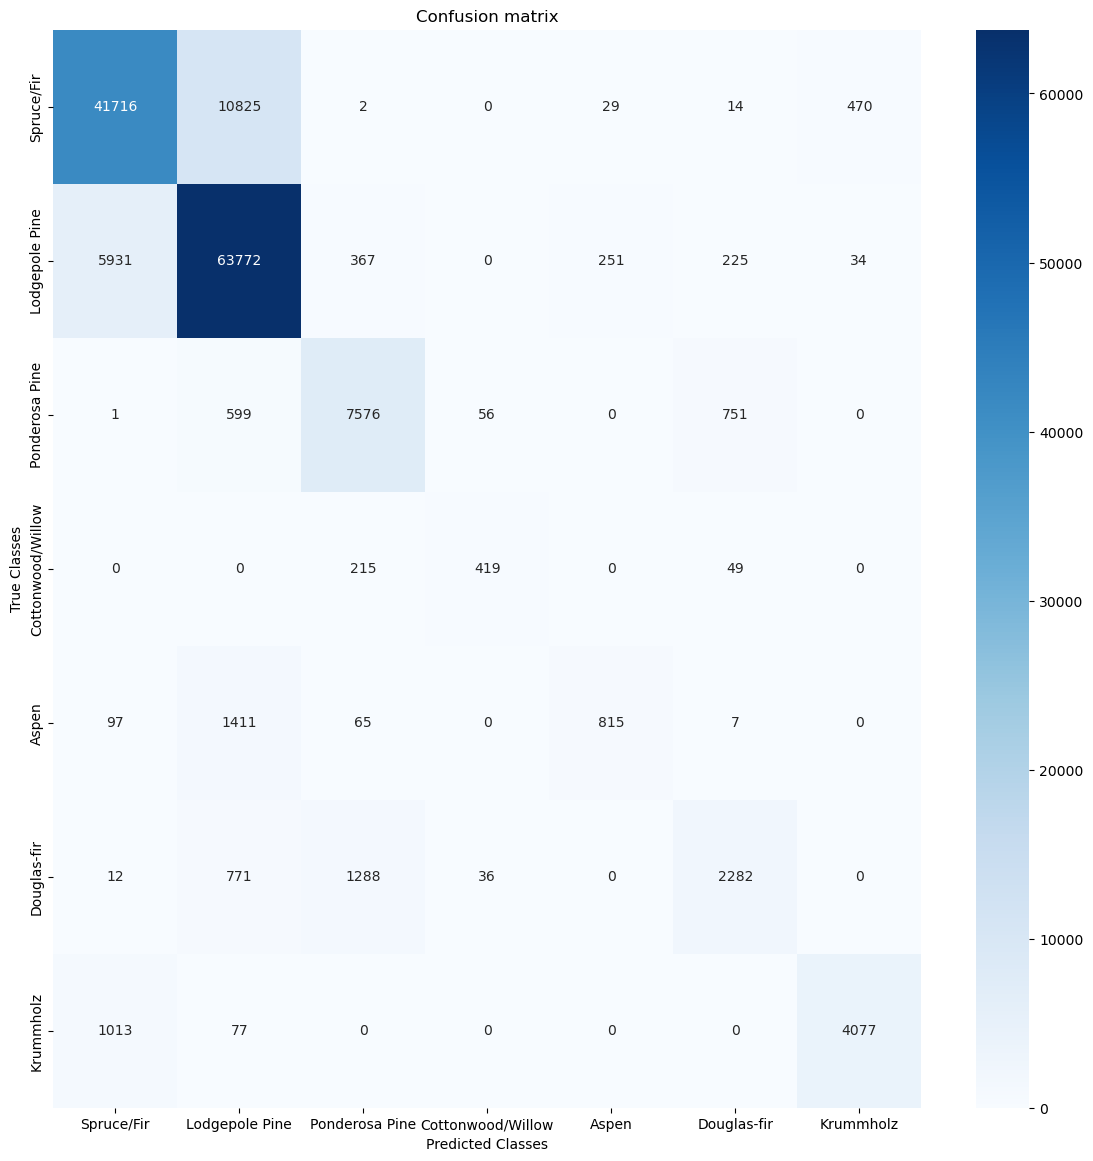

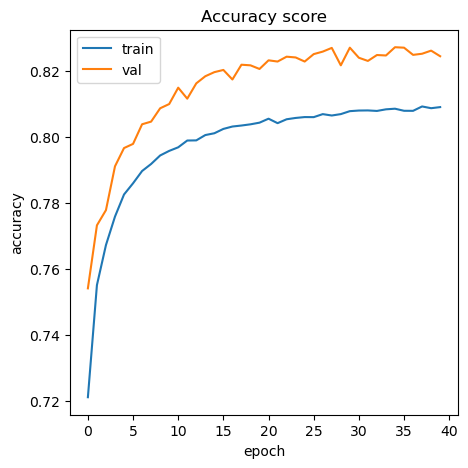

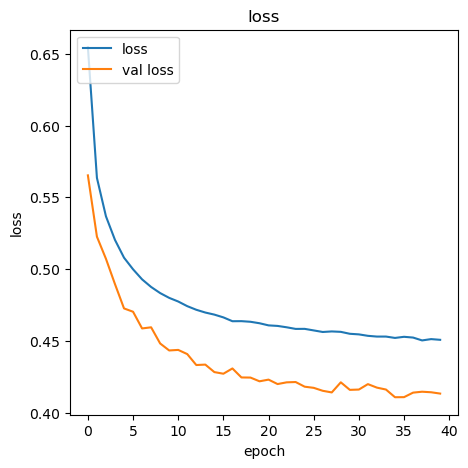

In [357]:
def give_info():
    heatmap()
    accuracy_curve()
    loss_curve()
give_info()

**Summary of findings**
While predictions for tree types are overall shown to have an accuracy of around 80% this does not tell the full picture of what is going on behind the scenes. Running a classification report on the data reveals limiting factors to the models effectivness. The staggering differnce in amount of data sampled from tree species ranges from just a few hundred to over 77,000 which I belive is leading to more skewed data.

Looking through the confususion matrix heatmap created in the figures above one can see that certain tree types do remarkably poorly consistently throughout every iteration of the training models. Douglass fir and Aspens see to be the hardest kinds of trees for this model to classify most probably due to their simiarity in looks. I would recommend retrieving more tree data in order to offset this issue.